#<center>**Project Name - <u>Book Recommendation System</u>**</center>

##### **Project Type**    - Unsupervised
#### **<u>Contribution -</u>** Team
##### **Team Member 1 -** Mujtaba Ali 
##### **Team Member 2 -** Prateek Sachdeva
##### **Team Member 3 -** Vishal Sahu

# **Project Summary -**


1. **Mujtaba Ali**
  * EDA
  * Preprocessing & Clean-Up

2. **Prateek Sachdeva**
  * Model Implementation  

3. **Vishal Sahu**
  * Model Evaluation



--------------------------------------------------------------------------------


* First of all we were provided with three datasets namely books,users, and ratings. We studied all datasets in that the various columns were ISBN	Book-Title,	Book-Author,	Year-Of-Publication,	Publisher,	Image-URL-S(Small)	Image-URL-M(Medium), Image-URL-L(Large), User-ID, Book-Rating,Location,and	Age. ISBN is International Standard Book Number.

* Then we started with exploratory data analysis by merging all three datasets and making a new dataframe(merged_df). So we proceeded with looking for missing values and outlier detection(year, and age columns) in the given dataset. We dropped te records where negligible values were missing. For age we are interested in the age group of 5-100 years. So by considering every other value as an outliers, we converted those into null values. For age column around 26% of the values were missing. So we imputed them using random imputation.

* We also got insights(into the relationship) by visualizing the variables using histplot,coutplot,barplot, pie chart, and distplot etc. After visualizing it, we got the insights that the majority of users did not rate the books. Also majority of the books were rated 8/10. Also the majority of the readers were in the age group of 20-45. Also the majority of users were from USA and Canada. We could see an exponential increase in the publication of books after the year 1950. The Authors who wrote the maximum no. of books were Agatha christie, and William Shakespeare. The maximum books were from the publication house Harlequin and Silhouette.

* We started with the implementation of the model where  we first used the popularity based approach using the average rating. We considered only those book which were rated atleast 200 times.

* There are two techniques we have used for recommendation namely Memory based and model based(SVD). In memory based we computed similarty using KNN and cosine similarity. In singular value decomposition we factorized the original metrix in three sub metrics namely U,Sigma, and Vt(V transpose). On multiplying these three the problem of sparsity is solved.

* Finally, We evaluated our models using recall at @5 and recall @10 where we got the value to be 81%.








# **GitHub Link -**

https://github.com/vishalsahuu/Book-Recommendation-System

# **Problem Statement**

### **Problem Statement**
---
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

# <u>**Overview about Project**</u>


* A book recommender system is a tool that suggests books to users based on their interests and reading history. These systems can be used by libraries, bookstores, or online retailers to help users discover new books that they might enjoy.

* There are several approaches to building a book recommender system, including collaborative filtering, content-based filtering, and hybrid systems that combine both approaches.

* <b>Collaborative filtering</b> is based on the idea that users who have similar reading histories are likely to have similar interests, so a book that one user likes is likely to be enjoyed by another user with a similar reading history. This approach is often used in recommendation systems for movies, music, and other products.

* <b>Content-based filtering</b>, on the other hand, focuses on the characteristics of the books themselves, such as their genre, theme, and author, to make recommendations. This approach is useful when there is not enough data available about users' preferences to use collaborative filtering.

* <b>Hybrid systems</b> combine both collaborative filtering and content-based filtering to make recommendations. They can take into account both the characteristics of the books and the preferences of the users to provide a more personalized recommendation.

* There are several challenges to building an effective book recommender system, including the need for large amounts of data to train the system, the complexity of natural language processing, and the need to balance the personalization of recommendations with the diversity of the books recommended.

### **Dataset Description**
---
The Book-Crossing dataset comprises 3 files.

* **Users:** Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

* **Books:** Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

* **Ratings:** Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.


# ***Let's Begin !***

# **Data Collection & Inspection**

### Importing Libraries

In [328]:
import pandas as pd # for manipulation of  tabular data
import numpy as np # for numeric python 

# For data visualization
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100}) # for setting the figure size.
import seaborn as sns # for visualization 
import random # to get random sample or data

# For Model building

import scipy
import math
from sklearn.metrics.pairwise import cosine_similarity # importing consine_similarity score from metrics module of seaborn lib.
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors # importing NearestNeighbors form neighbors module.
from sklearn.model_selection import train_test_split # importing train_test_split from model_preprocessing from sklearn module.
from scipy.sparse.linalg import svds 
from sklearn import preprocessing # for preprocessing

# Ignoring stopwords (words with no semantics) from English
import nltk
from nltk.corpus import stopwords # for handling stopwords in dataset.
from sklearn.preprocessing import normalize
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer # importing TfidfVectorizer from feature extraction

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore') # for ignoring the warnings

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading Dataset

In [329]:
# mounting the drive so that we can use drive here in google colab.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [330]:
# Reading the csv datasets

path = "/content/drive/MyDrive/Almabetter/Capstone03_Recommender_System/Datasets/"

df_books=pd.read_csv(path +'Books.csv') # reading Books csv file
df_ratings=pd.read_csv(path + 'Ratings.csv') # reading Ratings file
df_users=pd.read_csv(path + 'Users.csv') # reading Users file 

### Dataset First View

In [331]:
# Displaying top 5 records from the book dataframe using head method of df_books

df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [332]:
# Showing top 5 records from the Ratings dataframe using head method of df_ratings

df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [333]:
# Showing top 5 records from the Users dataframe using head method of df_users

df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Information & Description

In [334]:
# showing the basic stats of numeric features of books dataframe

df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [335]:
# Description(basic stats of numerical features) of df_books dataframe

df_books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/185326119X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/225307649X.01.LZZZZZZZ.jpg
freq,1,27,632,13903,7535,2,2,2


In [336]:
# showing the basic info of dataframe like not_null values, columns, and datatype

df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [337]:
# Description(Basic stats of numerical features) of df_ratings 

df_ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [338]:
# basic description of categorical features

df_ratings.describe(include = 'O')

,ISBN
count,1149780
unique,340556
top,0971880107
freq,2502


In [339]:
# basic information about df_users

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


<i>Age column has alot of missing values.</i>

In [340]:
# Description of the data

df_users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


<i>We have a lot of Outliers in Age columns. Which we need to handle later on.</i>

### Dataset Rows & Columns count

In [341]:
# Size of datasets

print(f'''\t  Size of books data is {df_books.shape}
          Size of ratings data is {df_ratings.shape}
          Size of users data is {df_users.shape}''')

	  Size of books data is (271360, 8)
          Size of ratings data is (1149780, 3)
          Size of users data is (278858, 3)


### Duplicate Values

In [342]:
# Checking duplicates in datasets using duplicated method of dataframe.

print(f'''\t  Duplicates in books data is {df_books.duplicated().sum()}
          Duplicates in ratings data is {df_ratings.duplicated().sum()}
          Duplicates in users data is {df_users.duplicated().sum()}''')

	  Duplicates in books data is 0
          Duplicates in ratings data is 0
          Duplicates in users data is 0


### Check Unique Values for each variable.

In [343]:
# Function check unique values for each variable.

def unique_values(dataset):
  """
  function : unique_values
  description : this takes a dataset and return unique values of each and every column/feature.
  return type : dataframe
  """

  list_unique_valeus = [dataset[col].nunique() for col in dataset.columns]
  list_cols = dataset.columns.tolist()
  data = list(zip(list_cols,list_unique_valeus))
  df = pd.DataFrame(data,columns = ['Column','No of Unique Values'])
  return df

In [344]:
unique_values(df_users) # calling unique_values function to see the unique values of features

,Column,No of Unique Values
0,User-ID,278858
1,Location,57339
2,Age,165


In [345]:
unique_values(df_ratings)

,Column,No of Unique Values
0,User-ID,105283
1,ISBN,340556
2,Book-Rating,11


In [346]:
unique_values(df_books)

,Column,No of Unique Values
0,ISBN,271360
1,Book-Title,242135
2,Book-Author,102023
3,Year-Of-Publication,202
4,Publisher,16807
5,Image-URL-S,271044
6,Image-URL-M,271044
7,Image-URL-L,271041


# **Data Pre-processing and Cleaning**

In [347]:
# Merging the data frames

merged_df=pd.merge(df_users,df_ratings,on='User-ID') # merging df_users with df_ratings based on User-ID
merged_df=pd.merge(merged_df,df_books,on='ISBN') # merging  merged_df with df_books based on ISBN

In [348]:
merged_df.head() # showing top 5 records of final dataframe

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg


In [327]:
merged_df.columns

Index(['User_ID', 'Age', 'ISBN', 'Book_Rating', 'Book_Title', 'Book_Author',
       'Year_Of_Publication', 'Publisher', 'Country', 'Avg_Ratings',
       'No_Of_Ratings'],
      dtype='object')

In [232]:
merged_df.info() # basic information about the final datafram after merging

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   Location             1031136 non-null  object 
 2   Age                  753301 non-null   float64
 3   ISBN                 1031136 non-null  object 
 4   Book-Rating          1031136 non-null  int64  
 5   Book-Title           1031136 non-null  object 
 6   Book-Author          1031135 non-null  object 
 7   Year-Of-Publication  1031136 non-null  object 
 8   Publisher            1031134 non-null  object 
 9   Image-URL-S          1031136 non-null  object 
 10  Image-URL-M          1031136 non-null  object 
 11  Image-URL-L          1031132 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


In [233]:
# Size of the merged dataset
merged_df.shape

(1031136, 12)

* <i>As we can see that there are 1031136 records and 12 columns in final dataframe</i>

In [234]:
# Total duplicates present in the data

merged_df.duplicated().sum()

0

<i>There is no duplicate record in final dataframe.</i>


In [235]:
# Dropping last three columns containing image URLs which will not be required for the analysis

merged_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True) # using drop method of dataframe object

# Making column names handy to use
# Replacing '-' with '_' and column name in lower case
# merged_df.columns= merged_df.columns.str.strip().str.lower().str.replace('-', '_')

merged_df.columns= merged_df.columns.str.replace('-', '_')
# To display the entire content of a column
pd.set_option('display.max_colwidth',None)

In [236]:
merged_df.columns

Index(['User_ID', 'Location', 'Age', 'ISBN', 'Book_Rating', 'Book_Title',
       'Book_Author', 'Year_Of_Publication', 'Publisher'],
      dtype='object')

In [237]:
# Create a country column at the place of location 

merged_df['Country'] = merged_df['Location'].astype(str).apply(lambda x:x.split(',')[-1])
# Drop the location column

merged_df.drop('Location',axis=1,inplace=True) # inplace =True means we are changing original datafram itself

In [238]:
# Unique values in the country column

merged_df['Country'].unique()

array([' usa', ' canada', ' n/a', '', ' malaysia', ' spain',
       ' new zealand', ' finland', ' united kingdom', ' portugal',
       ' brazil', ' germany', ' austria', ' italy', ' netherlands',
       ' australia', ' france', ' costa rica', ' poland', ' us', ' iran',
       ' aruba', ' india', ' pakistan', ' taiwan', ' singapore',
       ' argentina', ' romania', ' greece', ' ireland', ' philippines',
       ' belgium', ' philippines"', ' mexico', ' south africa',
       ' burkina faso', ' croatia', ' switzerland', ' denmark', ' rwanda',
       ' yugoslavia', ' turkey', ' china', ' japan', ' qatar', ' latvia',
       ' sweden', ' kuwait', ' indonesia', ' nepal', ' peru',
       ' venezuela', ' south korea"', ' hong kong', ' united states',
       ' slovakia', ' norway', ' dominican republic',
       ' bosnia and herzegovina', ' south korea', ' macedonia', ' kenya',
       ' mauritius', ' catalonia', ' nigeria', ' madagascar', ' israel',
       ' oman', ' egypt', ' lithuania', ' guate

In [239]:
# fix the unknown and missing values

merged_df['Country'] = merged_df['Country'].replace(' ','other').replace(' n/a','other')

In [240]:
# A function to get the missing values count and it's percentage
def missing_values(df):
  """
  Description : This function takes a data frame as an input and gives missing value count and its percentage as an output
  function_name : missing_values
  Argument : dataframe.
  Return : dataframe
  
  """
  miss = df.isnull().sum() # finding the missing values.
  
  per = df.isnull().mean() # finding mean/ Average of missing values.
  df = pd.concat([miss,per*100],keys = ['Missing_Values','Percentage'], axis = 1) # concatenating both of them using concat method of pandas module.
  return df # returning dataframe

In [241]:
# Check for missing values

missing_values(merged_df)

,Missing_Values,Percentage
User_ID,0,0.000000
Age,277835,26.944554
ISBN,0,0.000000
Book_Rating,0,0.000000
Book_Title,0,0.000000
Book_Author,1,0.000097
Year_Of_Publication,0,0.000000
Publisher,2,0.000194
Country,0,0.000000


In [242]:
merged_df.head() # Display the top five records of merged dataframe.

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country
0,2,18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,usa
1,8,NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
2,11400,49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
3,11676,NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,other
4,41385,NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada


In [243]:
# getting unique value from 'year_of_publication' feature

merged_df['Year_Of_Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1987, 1989, 1992, 1983, 1979, 1995, 1982, 1985, 1986,
       1978, 1980, 1952, 1990, 1981, 0, 1984, 1968, 1961, 1959, 1946,
       1974, 1958, 1976, 1971, '2002', 1977, 1975, 1965, 1941, 1970,
       '1996', '1999', 1972, '1989', '1992', '2001', 1953, 1962, 1973,
       '2004', 1960, '1997', '2000', '0', 1954, 1966, 1920, '1998',
       '2003', 1967, 1956, 1942, 1955, 1951, 1969, 1948, '1977', '1990',
       '1986', '1994', '1982', 1963, 1964, '1995', '1959', '1988', 1950,
       '1991', '1984', 2005, 1943, '1993', '1987', '1983', '1981', 1957,
       '1972', '1980', 1937, 1940, '1965', '1970', '1979', 1930, 1923,
       1945, 1947, '1976', 1936, '1985', '1978', 1925, '1966', '1958',
       '1975', '1973', 1927, '1974', '1967', '1971', '1969', 2030, '1968',
       2011, '1960', '1964', 2020, 1939, 1926, 1938, '1961', 1911, 1904,
       1949, 1932, 1929, '1953', '1963', '1955', '1944', '1920', '1

<i>Instead of years here a couple of mismatched values are present.</i>

In [244]:
# Rows where publisher was missing 

merged_df[merged_df['Publisher'].isnull()]

# merged_df.loc[(merged_df['publisher'].isnull()),:]

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country
857163,98391,52.0,193169656X,9,Tyrant Moon,Elaine Corvidae,2002,NaN,usa
857174,98391,52.0,1931696993,9,Finders Keepers,Linnea Sinclair,2001,NaN,usa


In [245]:
missing_values(merged_df)

,Missing_Values,Percentage
User_ID,0,0.000000
Age,277835,26.944554
ISBN,0,0.000000
Book_Rating,0,0.000000
Book_Title,0,0.000000
Book_Author,1,0.000097
Year_Of_Publication,0,0.000000
Publisher,2,0.000194
Country,0,0.000000


In [246]:
df_ = merged_df.copy() #

<i>Since we can see that book_author and publisher columns have negligible missing values, so we can drop these records which is not going to impact on overall accuracy.</i>

In [247]:
merged_df[['Book_Author','Publisher']].dropna(inplace = True) # dropping records where we have missing values in Book_Author and Publisher

In [248]:
# Extracting the mismatched values in features 'Year_Of_Publication', 'Publisher', 'book_author', and 'book_title'

index_list = list(merged_df[(merged_df['Year_Of_Publication'] == 'DK Publishing Inc') | (merged_df['Year_Of_Publication'] == 'Gallimard')].index)

In [249]:
index_list # list of index

[906829, 913994, 946370, 946371]

In [250]:
merged_df.drop(index = index_list,inplace = True) # dropping records which have mismatched values

In [251]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [252]:
merged_df['Year_Of_Publication'] = merged_df['Year_Of_Publication'].astype('int64') # converting into integer type

In [253]:
merged_df['Year_Of_Publication'].dtype # checking the data type of year of publication

dtype('int64')

# **Exploratory Data Analysis**

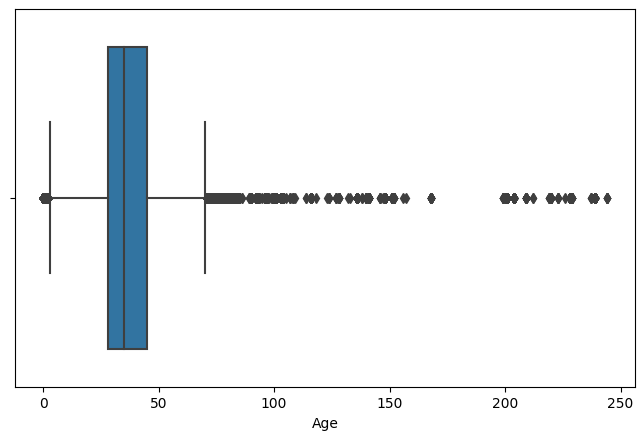

In [254]:
# Box plot for age

sns.boxplot(merged_df['Age']);

<i>It can be clearly seen that a lot of **outliers** are present in **age** column.</i>

In [255]:
# Outlier data became NaN

merged_df.loc[(merged_df.Age > 100) | (merged_df.Age < 5), 'Age'] = np.nan

In [256]:
# Null values in age column

nulls = sum(merged_df['Age'].isnull()) # checking the missing value in Age
print(nulls)

282467


In [257]:
# Imputing null values
median = merged_df['Age'].median() # finding the median of Age column
std = merged_df['Age'].std() # Standard Deviation of Age

# Fill invalid and missing ages with random normal distributed numbers

random_age = np.random.randint(median - std, median + std, size = nulls)
age = merged_df['Age'].copy() 
age[pd.isnull(age)] = random_age
merged_df['Age'] = age
merged_df['Age'] = merged_df['Age'].astype(int) # converting it into integer

In [258]:
missing_values(merged_df)

,Missing_Values,Percentage
User_ID,0,0.000000
Age,0,0.000000
ISBN,0,0.000000
Book_Rating,0,0.000000
Book_Title,0,0.000000
Book_Author,1,0.000097
Year_Of_Publication,0,0.000000
Publisher,2,0.000194
Country,0,0.000000


In [259]:
merged_df.shape # checking shape of final dataframe.

(1031132, 9)

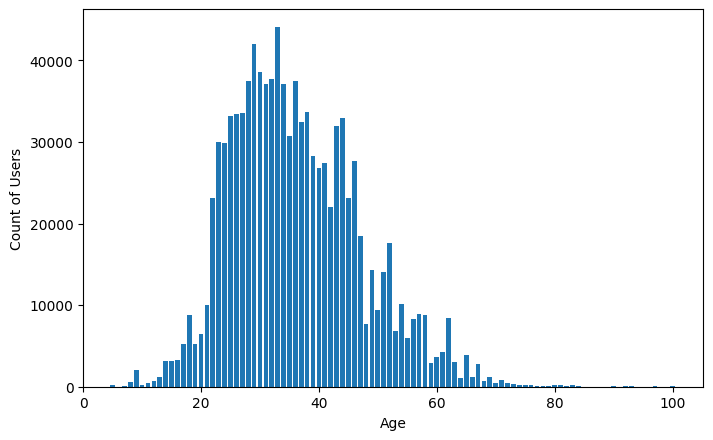

In [260]:
# Distribution of age after removing outliers and fixing missing values

u = merged_df.Age.value_counts().sort_index() # counting the values of Age
plt.bar(u.index, u.values) # barplot
plt.xlabel('Age')
plt.ylabel('Count of Users')
plt.xlim(xmin = 0)
plt.show()

<i>It's observable that **maximum** number of users were of the **age** in between **20 to 45**. </i>

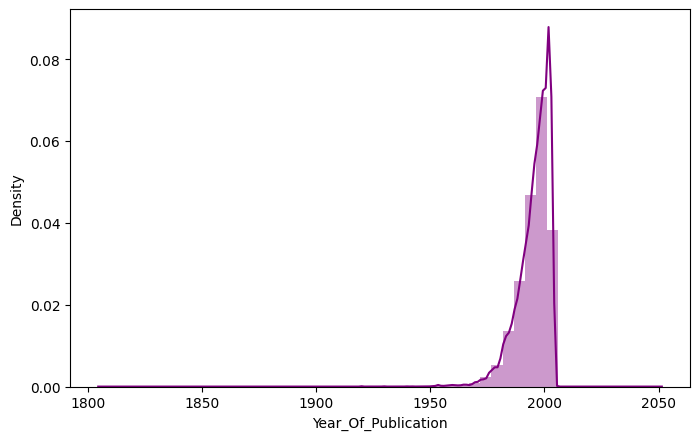

In [261]:
# showing the distribution of Year of Publication.

sns.distplot(merged_df[merged_df['Year_Of_Publication']>1800]['Year_Of_Publication'],color='purple',bins=50);

<i>There was an exponential increase in **book publication** after the year **1950**.</i>

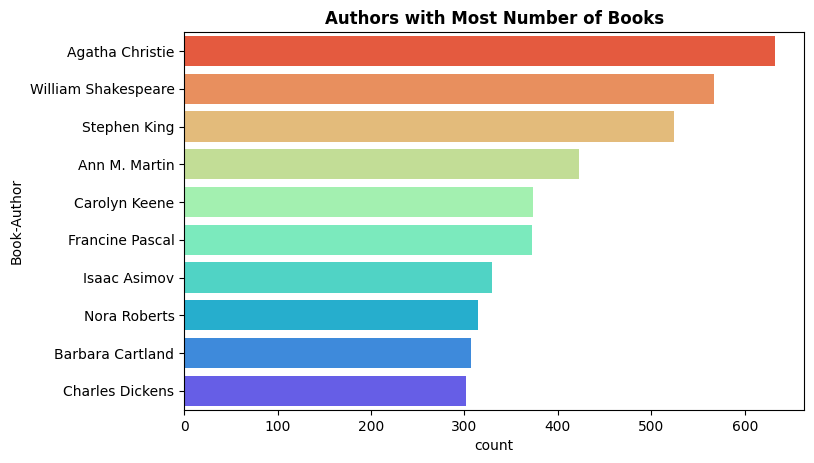

In [262]:
# ploatting the count of top 10 books using coutplot.

sns.countplot(y='Book-Author',data=df_books,order=pd.value_counts(df_books['Book-Author']).iloc[:10].index, palette='rainbow_r')
plt.title("Authors with Most Number of Books", fontweight='bold');

<i>Authors with the most books were **Agatha Christie, William Shakespeare** and **Stephen King**.</i>

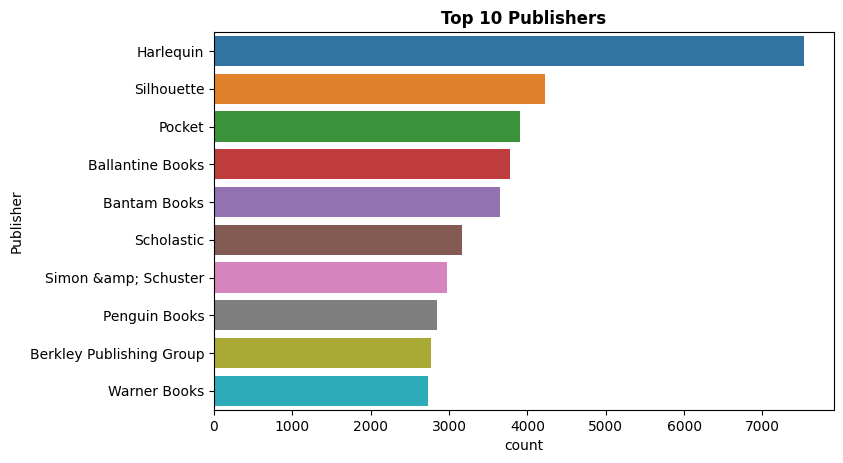

In [263]:
# Counting the top the publisher using countplot of seaborn 

sns.countplot(y='Publisher',data=df_books,order=pd.value_counts(df_books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers', fontweight='bold');

<i>Publisher with **highest** number of books published was **Harlequin** followed by **Solhoutte** and **Pocket**.</i>

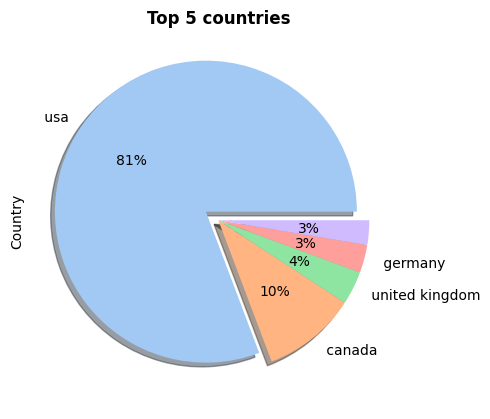

In [264]:
# Pie Graph of top five countires.

palette_color = sns.color_palette('pastel')
explode = (0.1, 0, 0, 0, 0)
merged_df.Country.value_counts().iloc[:5].plot(kind='pie', colors=palette_color, autopct='%.0f%%', explode=explode, shadow=True)
plt.title('Top 5 countries', fontweight='bold');

<i>Most of the **readers** were from **USA** followed by **Canada**.</i>

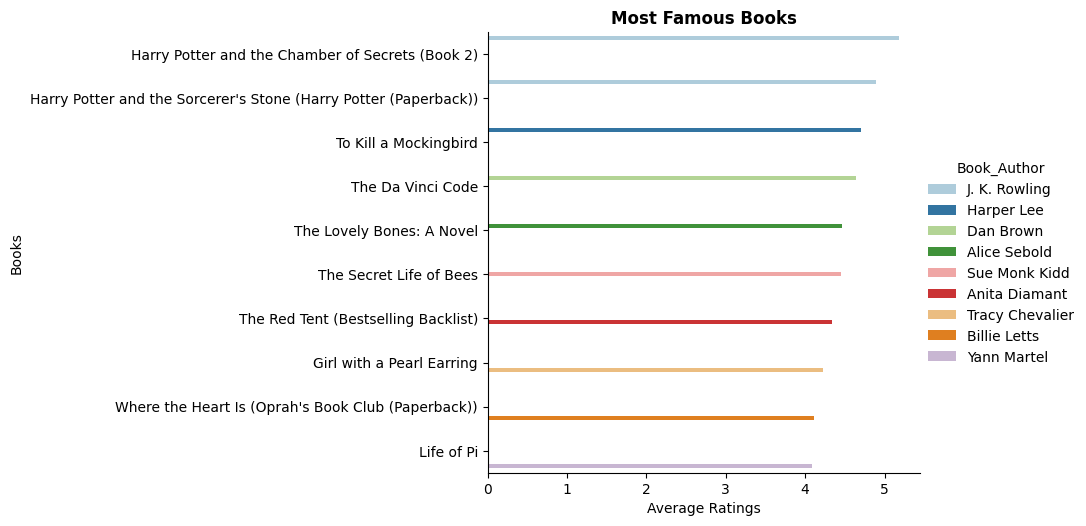

In [265]:
# Average Book ratings with respect to top 10 books using catplot

book_rating = merged_df.groupby(['Book_Title','Book_Author'])['Book_Rating'].agg(['count','mean']).sort_values(by='mean', ascending=False).reset_index()
sns.catplot(x='mean', y='Book_Title', data=book_rating[book_rating['count']>500][:10], kind='bar', palette = 'Paired',hue='Book_Author' )
plt.xlabel('Average Ratings')
plt.ylabel('Books')
plt.title('Most Famous Books', fontweight='bold');

<i>**Harry Potter** authored by **J K Rowling** had got the best average ratings followed by **To Kill a Mockingbird** and **The Da Vinci Code**.</i>

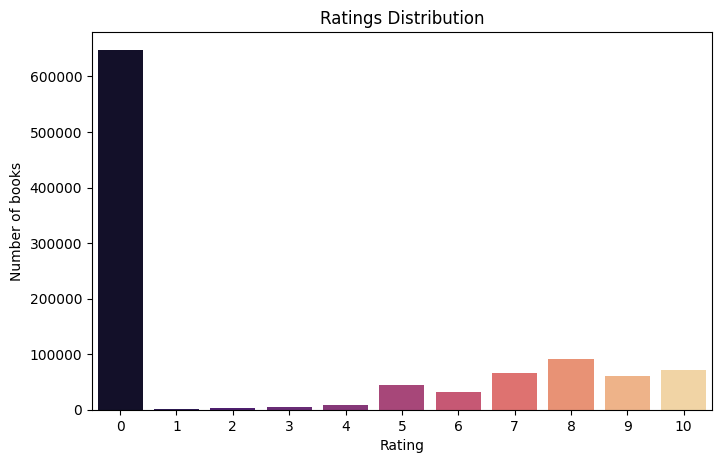

In [266]:
# barplot of book_rating with respect to its index

sns.barplot(x = merged_df['Book_Rating'].value_counts().index,y = merged_df['Book_Rating'].value_counts().values,
            palette = 'magma').set(title="Ratings Distribution", xlabel = "Rating",ylabel = 'Number of books')
plt.show();

<i>As we can see that more than 6 lakh have 0 rating</i>

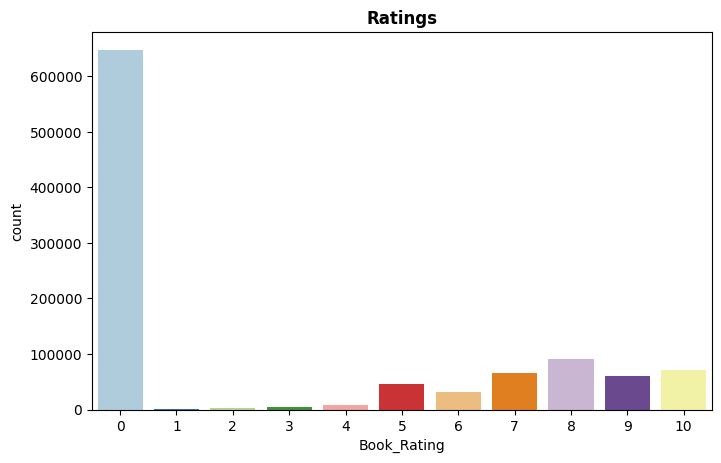

In [267]:
# coutplot of book_ratings

sns.countplot(x="Book_Rating", palette = 'Paired', data = merged_df)
plt.title("Ratings", fontweight='bold');

<i>Countplot of explicit ratings indicates that **higher ratings** are more common amongst users and rating **8** has been rated highest number of times.</i>

# **Recommender Systems**

## **Popularity Based Recommender System**

In [268]:
# Create column average ratings using groupby on book title because some of the books have same book title but different isbn number.

merged_df['Avg_Ratings'] =  merged_df.groupby('Book_Title')['Book_Rating'].transform('mean')

# Create column number of ratings
merged_df['No_Of_Ratings'] = merged_df.groupby('Book_Title')['Book_Rating'].transform('count')

# Create new data frame popular_df
popular_df = merged_df[['Book_Title','Avg_Ratings','No_Of_Ratings']]

In [269]:
# Drop duplicate books

popular_df.drop_duplicates('Book_Title',inplace=True)

In [270]:
popular_df.head()

,Book_Title,Avg_Ratings,No_Of_Ratings
0,Classical Mythology,3.500000,2
1,Clara Callan,4.928571,14
15,Decision in Normandy,5.000000,3
18,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,4.272727,11
29,The Mummies of Urumchi,0.000000,1


In [271]:
# Applying a constraint of number of ratings greater tha 200 to only keep the most popular books 

popular_df = popular_df[popular_df['No_Of_Ratings']>200].sort_values('Avg_Ratings',ascending=False)

In [272]:
# Top 10 recommended books
popular_df.head(10)

,Book_Title,Avg_Ratings,No_Of_Ratings
32601,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428
33024,Harry Potter and the Goblet of Fire (Book 4),5.824289,387
37538,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278
33218,Harry Potter and the Order of the Phoenix (Book 5),5.501441,347
72126,Ender's Game (Ender Wiggins Saga (Paperback)),5.409639,249
32080,Harry Potter and the Chamber of Secrets (Book 2),5.183453,556
167539,The Hobbit : The Enchanting Prelude to The Lord of the Rings,5.007117,281
37807,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",4.948370,368
125266,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),4.895652,575
37870,"The Two Towers (The Lord of the Rings, Part 2)",4.880769,260


## **Collaborative Filtering**

### **Item Based**

* Every user's rating at facevalue can't be considered because if the user is a **novice reader** with only an experience of reading a couple of books, his/her ratings might not be much relevant for finding similarity among books.
* Therefore as a general rule of thumb let's consider only those Users who have rated atleast **50** books and only those books which have got atleast **180** ratings.

In [273]:
# Checking the shape of merged dataframe
merged_df.shape

(1031132, 11)

In [274]:
merged_df.columns

Index(['User_ID', 'Age', 'ISBN', 'Book_Rating', 'Book_Title', 'Book_Author',
       'Year_Of_Publication', 'Publisher', 'Country', 'Avg_Ratings',
       'No_Of_Ratings'],
      dtype='object')

In [275]:
x = merged_df.groupby('User_ID').count()['Book_Rating'] > 180

In [276]:
x[x] #

User_ID
254       True
2033      True
2276      True
2766      True
2977      True
          ... 
277427    True
277478    True
277639    True
278188    True
278418    True
Name: Book_Rating, Length: 918, dtype: bool

In [277]:
merged_df['User_ID'].isin(x[x].index)

0          False
1          False
2          False
3           True
4          False
           ...  
1031131    False
1031132    False
1031133    False
1031134    False
1031135    False
Name: User_ID, Length: 1031132, dtype: bool

In [278]:
# df[df['Sales']>120]

In [279]:
print("Shape of merged dataframe : ",merged_df.shape)

Shape of merged dataframe :  (1031132, 11)


In [280]:
merged_df = merged_df[merged_df['Book_Rating']!=0] # taking explitcit rating_df means Taking where book rating is not equal to zero

In [281]:
print("Shape of merged dataframe Now : ",merged_df.shape)

Shape of merged dataframe Now :  (383841, 11)


In [282]:
# Applying constraint on user id using it's count 

x = merged_df.groupby('User_ID').count()['Book_Rating'] >180

filtered_df = merged_df[merged_df['User_ID'].isin(x[x].index)]

In [283]:
# Applying constraint on number of rartings

y = merged_df.groupby('Book_Title').count()['Book_Rating'] >50
filtered_df = filtered_df[filtered_df['Book_Title'].isin(y[y].index)]

In [284]:
filtered_df.shape

(5432, 11)

In [285]:
filtered_df.head() # head of filtered dataframe

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country,Avg_Ratings,No_Of_Ratings
31,11676,33,0399135782,9,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,other,2.996785,311
34,46398,37,0399135782,9,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,usa,2.996785,311
54,230522,52,0399135782,7,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,usa,2.996785,311
58,245827,43,0399135782,9,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,,2.996785,311
106,7346,49,0440234743,9,The Testament,John Grisham,1999,Dell,usa,3.179903,617


In [286]:
# From a user item matrix with values as ratings

pt = filtered_df.pivot_table(index='Book_Title',columns='User_ID',values='Book_Rating').fillna(0) # filling nan with 0

In [287]:
pt # showing the Pivot tabel

User_ID,2276,4385,6251,6575,7346,11676,12982,13552,16634,16795,...,258534,261829,262998,264321,265115,265889,268932,269566,270713,274061
Book_Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,8.0,10.000000,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,9.000000,0.0,0.0,0.0,9.0,...,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,10.0,0.0,0.0,0.0,0.0,7.500000,0.0,0.0,0.0,0.0,...,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,8.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Wizard and Glass (The Dark Tower, Book 4)",0.0,0.0,0.0,0.0,0.0,10.000000,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,10.000000,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [288]:
# Create an object of cosine similarity

similarity_scores = cosine_similarity(pt)

In [289]:
# Matrix size 

similarity_scores.shape

(625, 625)

In [290]:
for i,j in enumerate([1,2,3]):
  print(f"Index : {i} value {j}")


Index : 0 value 1
Index : 1 value 2
Index : 2 value 3


In [291]:
def recommend_book(book_name):
  """
  Description: It takes a book name and return data frame with similarity score 
  Function: recommend_book
  Argument: book_name
  Return type : dataframe
  """
  index = np.where(pt.index == book_name)[0][0] # finding index of same book
  similar_books = sorted(list(enumerate(similarity_scores[index])), key = lambda x:x[1], reverse = True)[1:6] # creating the list tuple of index with respect to similarity score
  
  # print(similar_books)
  
  print("\n----------------Recommended books-----------------\n")
  for i in similar_books:
    print(pt.index[i[0]]) 
  print("\n.....................................................\n")  
  return find_similarity_score(similar_books,pt)  

In [292]:
def find_similarity_score(similarity_scores,pivot_table):

  """
  Description: It takes similarity_Score and pivot table and return dataframe.
  function : find_similarity_Score
  Output : dataframe
  Argument  similarity_score and pivot table
  """
  list_book = []
  list_sim = []
  for i in similarity_scores:
    index_ = i[0]
    sim_ = i[1]
    list_sim.append(sim_)
    # list_book.append(pivot_table[pivot_table.index == index_]['Book-Title'][index_])
    list_book.append(pivot_table.iloc[index_,:].name)
    
    df = pd.DataFrame(list(zip(list_book, list_sim)),
               columns =['Book', 'Similarity'])
  # df =pd.DataFrame([list_book, list_sim], columns = ["Book",'Similarity_Score'])
  return df

In [293]:
recommend_book('Harry Potter and the Prisoner of Azkaban (Book 3)')


----------------Recommended books-----------------

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Sorcerer's Stone (Book 1)

.....................................................



,Book,Similarity
0,Harry Potter and the Goblet of Fire (Book 4),0.781504
1,Harry Potter and the Chamber of Secrets (Book 2),0.667914
2,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),0.549675
3,Harry Potter and the Order of the Phoenix (Book 5),0.543507
4,Harry Potter and the Sorcerer's Stone (Book 1),0.538940


In [294]:
recommend_book('1984') # calling recommend_book and recommend the books with their similarity score


----------------Recommended books-----------------

The Tale of the Body Thief (Vampire Chronicles (Paperback))
The Catcher in the Rye
The Devil Wears Prada : A Novel
Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death
The Sweet Potato Queens' Book of Love

.....................................................



,Book,Similarity
0,The Tale of the Body Thief (Vampire Chronicles (Paperback)),0.598378
1,The Catcher in the Rye,0.547964
2,The Devil Wears Prada : A Novel,0.524092
3,Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death,0.512985
4,The Sweet Potato Queens' Book of Love,0.512650


In [295]:
# Create an object of csr matrix
# Sparse Matrix Representations 

df_matrix = csr_matrix(pt.values)

In [296]:
# Building a KNN model with Cosine Similarity as the target metric for calculating the distances.

knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors=5)
knn.fit(pt) # training knn 

NearestNeighbors(algorithm='brute', metric='cosine')

In [297]:
def recommend(movie, n_values=11):
  
  distances, indices = knn.kneighbors(pt.loc[movie,:].values.reshape(1, -1), n_neighbors = n_values)
  dist = distances.flatten().tolist()
  movies = []
  for i in range(1, len(indices.flatten())):
    movies.append(pt.index[indices.flatten()[i]])
  
  data = list(zip(movies,dist))
  df = pd.DataFrame(data,columns=['Movie','Distance'])
  return df

In [298]:
recommend("Harry Potter and the Sorcerer's Stone (Book 1)")

,Movie,Distance
0,Harry Potter and the Prisoner of Azkaban (Book 3),2.220446e-16
1,Harry Potter and the Chamber of Secrets (Book 2),4.610596e-01
2,Harry Potter and the Goblet of Fire (Book 4),4.702757e-01
3,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),4.976998e-01
4,Harry Potter and the Order of the Phoenix (Book 5),6.041140e-01
5,"The Shelters of Stone (Earth's Children Series, No 5)",6.090062e-01
6,Catering to Nobody,6.359324e-01
7,Four Blondes,6.432822e-01
8,The Bonesetter's Daughter,6.540528e-01
9,G Is for Gumshoe (Kinsey Millhone Mysteries (Paperback)),6.622018e-01


### **User Based**

Recommender systems have a problem known as user **cold-start**, in which it is hard to provide **personalized** recommendations for users with none or a very few number of consumed items, due to the **lack** of information to model their preferences. For this reason, we are keeping in the dataset only users with at least **100** interactions.

In [299]:
users_ratings_count_df = merged_df.groupby(['Book_Title', 'User_ID']).size().groupby('User_ID').size()
print('Number of users: %d' % len(users_ratings_count_df))


users_with_enough_ratings_df = users_ratings_count_df[users_ratings_count_df >50].reset_index()[['User_ID']] # Users who rated more than 50 books
print('Number of users with at least 10 ratings: %d' % len(users_with_enough_ratings_df))

Number of users: 68091
Number of users with at least 10 ratings: 1144


In [300]:
print('Number of ratings : %d' % len(merged_df))
ratings_from_selected_users_df = merged_df.merge(users_with_enough_ratings_df, 
               how = 'right',
               left_on = "User_ID",
               right_on = "User_ID"
               
               )
print('Number of ratings from users with at least 100 interactions: %d' % len(ratings_from_selected_users_df))

Number of ratings : 383841
Number of ratings from users with at least 100 interactions: 151617


In [301]:
ratings_from_selected_users_df.head()

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country,Avg_Ratings,No_Of_Ratings
0,254,24,0060502320,7,"I've Got You, Babe",Karen Kendall,2002,Avon,usa,2.500000,6
1,254,24,0060934700,9,Smoke and Mirrors: Short Fictions and Illusions,Neil Gaiman,2001,Perennial,usa,4.057143,35
2,254,24,0060976977,7,"Amazing Grace : Lives of Children and the Conscience of a Nation, The",Jonathan Kozol,1996,Perennial,usa,4.230769,13
3,254,24,0064471047,7,"The Lion, the Witch, and the Wardrobe (The Chronicles of Narnia, Book 2)",C. S. Lewis,1994,HarperCollins,usa,4.692308,78
4,254,24,0066238501,5,Complete Chronicles of Narnia,C. S. Lewis,2001,Harpercollins Juvenile Books,usa,5.862069,29


In [302]:
# Create an object of label encoder

le = preprocessing.LabelEncoder()
le.fit(merged_df['Book_Title'].unique()) 

LabelEncoder()

In [303]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
ratings_full_df = ratings_from_selected_users_df.groupby(['Book_Title','User_ID'])['Book_Rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item interactions: %d' % len(ratings_full_df))
ratings_full_df.head()

Number of unique user/item interactions: 150731


,Book_Title,User_ID,Book_Rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",96448,3.321928
1,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",269557,3.169925
2,Dark Justice,98391,3.459432
3,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",26544,3.321928
4,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",179730,1.000000


In [304]:
ratings_train_df, ratings_test_df = train_test_split(ratings_full_df, 
                                   test_size=0.20,
                                   stratify=ratings_full_df['User_ID'],
                                   random_state=42)

print('Number of ratings on Train set: %d' % len(ratings_train_df))
print('Number of ratings on Test set: %d' % len(ratings_test_df))

Number of ratings on Train set: 120584
Number of ratings on Test set: 30147


In [305]:
ratings_train_df['Book_Title'] = le.transform(ratings_train_df['Book_Title'])
ratings_test_df['Book_Title'] = le.transform(ratings_test_df['Book_Title'])

ratings_train_df.head()

,Book_Title,User_ID,Book_Rating
17422,15082,193560,3.321928
64733,61467,229632,2.584963
4181,3457,24933,2.584963
68499,65202,203240,3.169925
18851,16258,55492,2.807355


In [306]:
ratings_train_df.duplicated().sum()

0

In [307]:
# Creating a sparse pivot table with users in rows and items in columns

users_items_pivot_matrix_df = ratings_train_df.pivot(index='User_ID', columns='Book_Title', values= 'Book_Rating').fillna(0)

users_items_pivot_matrix_df.head()

Book_Title,1,2,3,4,8,9,10,11,13,14,...,135531,135532,135535,135537,135538,135541,135547,135551,135555,135562
User_ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [308]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [309]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[254, 638, 1424, 1733, 1903, 2033, 2110, 2276, 2766, 2891]

#### Singular Value Decomposition 

In [310]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

# Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [311]:
users_items_pivot_matrix.shape

(1144, 66956)

In [312]:
U.shape # shape of U

(1144, 15)

In [313]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [314]:
Vt.shape # shape of Vt

(15, 66956)

After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [315]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 4.96855087e-04,  3.37857817e-05,  2.63143285e-03, ...,
        -2.75974424e-03,  2.11460268e-05, -1.07120880e-04],
       [ 3.46757380e-04,  2.26384791e-03,  2.49522927e-03, ...,
        -9.66511782e-04,  3.99291998e-05, -1.01034249e-04],
       [ 1.50781074e-04, -3.82760379e-04,  6.12356533e-04, ...,
         2.61541829e-03,  3.46772063e-05, -1.62625145e-05],
       ...,
       [ 8.44466899e-05, -5.03716213e-04,  5.85588229e-04, ...,
         1.27678721e-03,  1.58693172e-05, -1.99653627e-05],
       [-3.89541137e-06,  2.63536520e-03,  3.98668834e-04, ...,
         2.19642630e-03, -1.22324187e-05, -1.25016972e-05],
       [-2.62458026e-06,  2.38699483e-04,  5.97919766e-04, ...,
        -4.29148394e-04, -3.32900072e-05, -2.85845233e-05]])

In [316]:
all_user_predicted_ratings.shape

(1144, 66956)

In [317]:
# Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,254,638,1424,1733,1903,2033,2110,2276,2766,2891,...,274004,274061,274111,274301,275970,276680,277427,278137,278188,278418
Book_Title,,,,,,,,,,,,,,,,,,,,,
1,0.000497,0.000347,0.000151,-0.000020,0.000079,0.000591,0.000099,0.000122,0.000208,0.000147,...,0.000290,0.000069,0.000034,0.000244,0.000593,0.000384,0.000345,0.000084,-0.000004,-0.000003
2,0.000034,0.002264,-0.000383,0.008352,-0.000046,0.001903,0.000283,0.001498,-0.000723,0.000500,...,-0.000311,-0.002793,-0.000188,-0.003625,-0.000312,0.002042,-0.001734,-0.000504,0.002635,0.000239
3,0.002631,0.002495,0.000612,0.000844,0.000299,0.002792,0.000670,0.001680,0.001421,0.000738,...,0.001745,0.005029,0.000157,0.002994,0.002235,0.001760,0.002179,0.000586,0.000399,0.000598
4,0.017735,0.009834,0.004691,0.000527,0.002654,0.022607,0.003377,0.004680,0.006163,0.004904,...,0.010246,0.007609,0.001206,0.009970,0.019882,0.011010,0.012894,0.002546,0.000115,0.000777
8,0.003947,0.002743,0.001104,0.000271,0.000606,0.004519,0.000794,0.001273,0.001638,0.001163,...,0.002451,0.001941,0.000262,0.002584,0.004351,0.002822,0.002910,0.000644,0.000134,0.000245


In [318]:
# Number of users
len(cf_preds_df.columns)

1144

In [319]:
class CFRecommender:
    '''
    Class_Name : CFRecommender
    Description : This class is used to recommend book using SVD(Singular value decomposition)
  
    '''
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None): # constructor of class
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self): # to get the model name
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False): # to recommend the items
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['Book_Title'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'Book_Title', 
                                                          right_on = 'Book_Title')[['recStrength', 'Book_Title']]


        return recommendations_df # returning dataframe of recommended book
    
cf_recommender_model = CFRecommender(cf_preds_df, filtered_df) # making object of CFRecommender

#### **Evaluation**

In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with **Top-N accuracy metrics**, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

This evaluation method works as follows:

* For each user
    * For each item the user has interacted in test set
        * Sample 100 other items the user has never interacted.   
        * Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        * Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* Aggregate the global Top-N accuracy metrics

In [320]:
#Indexing by personId to speed up the searches during evaluation
ratings_full_indexed_df = ratings_full_df.set_index('User_ID') # set the index as User_ID
ratings_train_indexed_df = ratings_train_df.set_index('User_ID')
ratings_test_indexed_df = ratings_test_df.set_index('User_ID')

`The Top-N accuracy metric choosen was **Recall@N** which evaluates whether the interacted item is among the top N items (hit) in the ranked list of 101 recommendations for a user.

In [321]:
def get_items_rated(person_id, ratings_df):
    rated_items = ratings_df.loc[person_id]['Book_Title']
    return set(rated_items if type(rated_items) == pd.Series else [rated_items]) # 

In [322]:
#Top-N accuracy metrics consts

EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    def get_not_rated_items_sample(self, person_id, sample_size, seed=42):

            rated_items = get_items_rated(person_id, ratings_full_indexed_df)
            all_items = set(filtered_df['Book_Title'])
            non_rated_items = all_items - rated_items

            random.seed(seed) 
            non_rated_items_sample = random.sample(non_rated_items, sample_size)
            return set(non_rated_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user

    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        rated_values_testset = ratings_test_indexed_df.loc[person_id]
        
        if type(rated_values_testset['Book_Title']) == pd.Series:
            person_rated_items_testset = set(rated_values_testset['Book_Title'])
        else:
            person_rated_items_testset = set([int(rated_values_testset['Book_Title'])])
            
        rated_items_count_testset = len(person_rated_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_rated(person_id, ratings_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_rated_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_rated_items_sample = self.get_not_rated_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_rated_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['Book_Title'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['Book_Title'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(rated_items_count_testset)
        recall_at_10 = hits_at_10_count / float(rated_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'rated_count': rated_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model): # taking model and self which is an object of respective class
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(ratings_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['_person_id'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('rated_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['rated_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['rated_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()  

In [323]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
1143 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.5864265101005075, 'recall@10': 0.5864265101005075}


,hits@5_count,hits@10_count,rated_count,recall@5,recall@10,_person_id
14,717,717,1339,0.535474,0.535474,11676
26,441,441,1131,0.389920,0.389920,98391
110,73,73,365,0.200000,0.200000,189835
19,168,168,364,0.461538,0.461538,153662
45,82,82,234,0.350427,0.350427,23902
78,129,129,203,0.635468,0.635468,235105
155,49,49,202,0.242574,0.242574,76499
38,83,83,191,0.434555,0.434555,171118
20,116,116,189,0.613757,0.613757,16795
21,77,77,188,0.409574,0.409574,248718


# **<u>Conclusions</u>**


* First We got insights that the majority of users did not rate the books. Also majority of the books were rated <b>8/10</b>.

* The majority of the readers were in the age group of <b>20-45</b>.

*  We saw an exponential increase in the publication of books after the year <b>1950</b>.

* <i>Agatha christie, and William Shakespeare</i> wrote the maximum no. of books.

* And the maximum books were from the publication house <b>Harlequin and Silhouette</b>.

* <b>Harry Potter authored by J K Rowling</b> had got the best average ratings followed by To Kill a Mockingbird and The Da Vinci Code.

* Finally, we evaluated our models using recall at @5 and recall @10 where we got the value to be <b>81%</b>.